IMPORTING THE DEPENDENCIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

COLLECTING DATA

In [ ]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852
362,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,28479699446
363,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,29603577251
364,2021-12-10,47642.144531,50015.253906,47023.699219,47243.304688,47243.304688,30966005122
365,2021-12-11,47339.375000,48815.453125,46942.347656,48306.109375,48306.109375,32251240448


SPLITTING TRAINING DATA


In [ ]:
data_training = data[data['Date']< '2021-11-02'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,18263.929688,18268.453125,17619.533203,18058.904297,18058.904297,27919640985
1,2020-12-12,18051.320313,18919.550781,18046.041016,18803.656250,18803.656250,21752580802
2,2020-12-13,18806.765625,19381.535156,18734.332031,19142.382813,19142.382813,25450468637
3,2020-12-14,19144.492188,19305.099609,19012.708984,19246.644531,19246.644531,22473997681
4,2020-12-15,19246.919922,19525.007813,19079.841797,19417.076172,19417.076172,26741982541
...,...,...,...,...,...,...,...
321,2021-10-28,58470.730469,62128.632813,58206.917969,60622.136719,60622.136719,45257083247
322,2021-10-29,60624.871094,62927.609375,60329.964844,62227.964844,62227.964844,36856881767
323,2021-10-30,62239.363281,62330.144531,60918.386719,61888.832031,61888.832031,32157938616
324,2021-10-31,61850.488281,62406.171875,60074.328125,61318.957031,61318.957031,32241199927


SPLITTING TEST DATA

In [ ]:
data_test = data[data['Date']> '2021-11-02'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
327,2021-11-03,63254.335938,63516.937500,61184.238281,62970.046875,62970.046875,36124731509
328,2021-11-04,62941.804688,63123.289063,60799.664063,61452.230469,61452.230469,32615846901
329,2021-11-05,61460.078125,62541.468750,60844.609375,61125.675781,61125.675781,30605102446
330,2021-11-06,61068.875000,61590.683594,60163.781250,61527.480469,61527.480469,29094934221
331,2021-11-07,61554.921875,63326.988281,61432.488281,63326.988281,63326.988281,24726754302
332,2021-11-08,63344.066406,67673.742188,63344.066406,67566.828125,67566.828125,41125608330
333,2021-11-09,67549.734375,68530.335938,66382.062500,66971.828125,66971.828125,42357991721
334,2021-11-10,66953.335938,68789.625000,63208.113281,64995.230469,64995.230469,48730828378
335,2021-11-11,64978.890625,65579.015625,64180.488281,64949.960938,64949.960938,35880633236
336,2021-11-12,64863.980469,65460.816406,62333.914063,64155.941406,64155.941406,36084893887


REMOVING UNNECESSARY COLUMNS

In [ ]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,18263.929688,18268.453125,17619.533203,18058.904297,27919640985
1,18051.320313,18919.550781,18046.041016,18803.656250,21752580802
2,18806.765625,19381.535156,18734.332031,19142.382813,25450468637
3,19144.492188,19305.099609,19012.708984,19246.644531,22473997681
4,19246.919922,19525.007813,19079.841797,19417.076172,26741982541


SCALING THE DATE USING MIN MAX SCALER, VALUE MIN - 0 MAX - 1

In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.0044339 , 0.        , 0.        , 0.        , 0.02749008],
       [0.        , 0.01338002, 0.00927369, 0.01553705, 0.00892466],
       [0.01575455, 0.02287377, 0.02423942, 0.02260358, 0.02005685],
       ...,
       [0.9215266 , 0.90546521, 0.94146071, 0.91438207, 0.04024912],
       [0.91341675, 0.90702757, 0.92310807, 0.90249331, 0.04049977],
       [0.90236296, 0.90729126, 0.91486421, 0.89593114, 0.05226862]])

TRAINING MODEL 



In [ ]:
X_train = []
Y_train = []

In [ ]:
training_data.shape[0]

326

TRAINING DATASET SIZE 60 DAYS

In [ ]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train.shape

(266, 60, 5)

BUILDING LSTM - Long short term memory

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

50 units passed and activation function relu 


In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

LAYERING DATA


In [ ]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

OPTIMIZER - ADAM OPTIMIZER

LOSS FUNCTION - mean_squared_error or mean_absolute_error

absolute error more accurate and interpretable 

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')

ADJUST TO GET LOWER LOSS


In [ ]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/20
6/6 [==============================] - 5s 182ms/step - loss: 0.5128
Epoch 2/20
6/6 [==============================] - 1s 180ms/step - loss: 0.1718
Epoch 3/20
6/6 [==============================] - 1s 180ms/step - loss: 0.1460
Epoch 4/20
6/6 [==============================] - 1s 174ms/step - loss: 0.1564
Epoch 5/20
6/6 [==============================] - 1s 173ms/step - loss: 0.1579
Epoch 6/20
6/6 [==============================] - 1s 174ms/step - loss: 0.1654
Epoch 7/20
6/6 [==============================] - 1s 174ms/step - loss: 0.1366
Epoch 8/20
6/6 [==============================] - 1s 175ms/step - loss: 0.1271
Epoch 9/20
6/6 [==============================] - 1s 175ms/step - loss: 0.1277
Epoch 10/20
6/6 [==============================] - 1s 179ms/step - loss: 0.1274
Epoch 11/20
6/6 [==============================] - 1s 177ms/step - loss: 0.1335
Epoch 12/20
6/6 [==============================] - 1s 176ms/step - loss: 0.1289
Epoch 13/20
6/6 [==============================] 

CREATING TEST DATA

In [ ]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,49288.250000,50982.273438,48386.085938,50025.375000,43206179619
1,50009.324219,50545.582031,49548.781250,49944.625000,37471327794
2,49937.859375,51868.679688,49538.597656,51753.410156,30322676319
3,51769.003906,52700.941406,51053.679688,52633.535156,38884105426
4,52660.480469,52853.765625,43285.207031,46811.128906,65210059683


In [ ]:
inputs = scaler.transform(df)
inputs

array([[0.65143554, 0.67226711, 0.66896691, 0.66688606, 0.07350893],
       [0.6664733 , 0.66329313, 0.69424777, 0.66520145, 0.05624464],
       [0.66498292, 0.69048271, 0.69402634, 0.70293641, 0.03472422],
       [0.70317082, 0.70758564, 0.72696925, 0.72129762, 0.06049769],
       [0.72176226, 0.71072617, 0.55805689, 0.5998303 , 0.13974977],
       [0.6001229 , 0.59729643, 0.58580544, 0.58481509, 0.09097411],
       [0.57816253, 0.59581467, 0.60990451, 0.59107435, 0.05986114],
       [0.5911325 , 0.59108393, 0.58108909, 0.55962457, 0.06131219],
       [0.5592911 , 0.56925066, 0.59139067, 0.56624925, 0.04729921],
       [0.56631472, 0.57737992, 0.5907861 , 0.58422842, 0.02737671],
       [0.5840534 , 0.58218452, 0.5647128 , 0.56127609, 0.06677693],
       [0.56117242, 0.59491408, 0.58995705, 0.60570011, 0.05979941],
       [0.60575862, 0.62023867, 0.63390021, 0.62831156, 0.03521137],
       [0.62788346, 0.62098586, 0.64055868, 0.62011302, 0.03906409],
       [0.61979389, 0.6142885 , 0.

TESTING DATA

In [ ]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [ ]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((39, 60, 5), (39,))

In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

(array([[0.8105149 ],
        [0.80929667],
        [0.80812186],
        [0.8070433 ],
        [0.8060271 ],
        [0.80523664],
        [0.8052666 ],
        [0.8067617 ],
        [0.8098628 ],
        [0.81428   ],
        [0.8195466 ],
        [0.8251829 ],
        [0.83090025],
        [0.8364456 ],
        [0.8411344 ],
        [0.84422356],
        [0.8451198 ],
        [0.8434201 ],
        [0.8393374 ],
        [0.83336085],
        [0.8258123 ],
        [0.8169722 ],
        [0.8071931 ],
        [0.7969558 ],
        [0.78652906],
        [0.77587515],
        [0.765247  ],
        [0.75510925],
        [0.7458276 ],
        [0.7376439 ],
        [0.7305998 ],
        [0.7244313 ],
        [0.7182453 ],
        [0.71120614],
        [0.7029921 ],
        [0.69373447],
        [0.683705  ],
        [0.6731049 ],
        [0.6620475 ]], dtype=float32),
 array([0.94269351, 0.93617578, 0.90527488, 0.89711647, 0.90725281,
        0.94456481, 1.03227259, 1.0198349 , 0.97865851, 0

VALUES SCALED DOWN DUE TO MIN MAX, REVERTING TO ACTUAL VALUE IS NESSASARY

In [ ]:
scaler.scale_

array([2.08546598e-05, 2.05499421e-05, 2.17433172e-05, 2.08620484e-05,
       3.01041645e-12])

PREDICTING THE PRICE

In [ ]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [ ]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [ ]:
Y_pred

array([[15642.05  ],
       [15618.539 ],
       [15595.866 ],
       [15575.052 ],
       [15555.44  ],
       [15540.185 ],
       [15540.764 ],
       [15569.616 ],
       [15629.465 ],
       [15714.711 ],
       [15816.351 ],
       [15925.126 ],
       [16035.465 ],
       [16142.484 ],
       [16232.973 ],
       [16292.59  ],
       [16309.886 ],
       [16277.084 ],
       [16198.292 ],
       [16082.951 ],
       [15937.272 ],
       [15766.668 ],
       [15577.942 ],
       [15380.374 ],
       [15179.149 ],
       [14973.54  ],
       [14768.429 ],
       [14572.781 ],
       [14393.656 ],
       [14235.719 ],
       [14099.776 ],
       [13980.7295],
       [13861.348 ],
       [13725.499 ],
       [13566.977 ],
       [13388.315 ],
       [13194.757 ],
       [12990.187 ],
       [12776.791 ]], dtype=float32)

In [ ]:
Y_test

array([18192.9514074 , 18067.16630732, 17470.81274579, 17313.36441308,
       17508.98470647, 18229.06541487, 19921.72932098, 19681.69560567,
       18887.03650739, 18840.78837869, 18556.69969274, 18676.33451646,
       19105.33673116, 18380.84926789, 16939.36566713, 17028.11704787,
       15633.95064225, 16124.54523344, 16774.70899681, 16362.7143713 ,
       15395.85854036, 15903.49530839, 15742.33196969, 16464.71588732,
       14362.25994772, 14795.55886613, 15793.23997036, 16009.85326987,
       15638.71427676, 15763.24165161, 15478.20809969, 14358.81849676,
       12537.08525567, 12622.39361379, 13092.62091697, 13127.16119625,
       13039.59679339, 11909.48036673, 11787.62408593])

GRAPH VISUALIZATUION - MATPLOTLIB

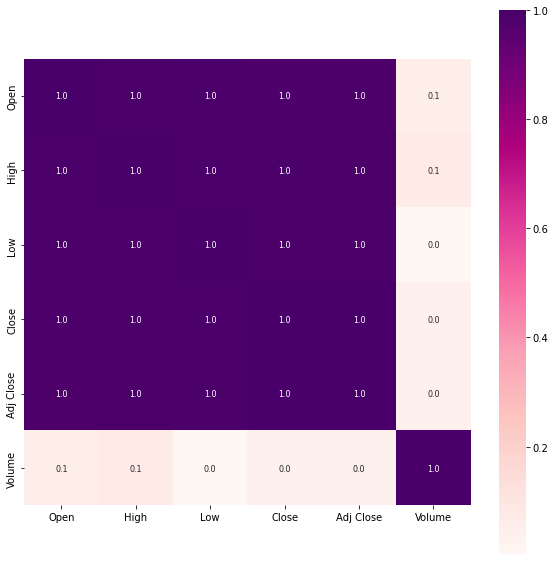

In [ ]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='RdPu')

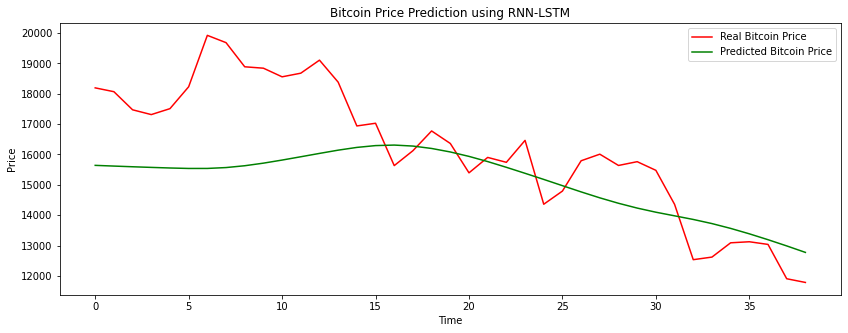

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()